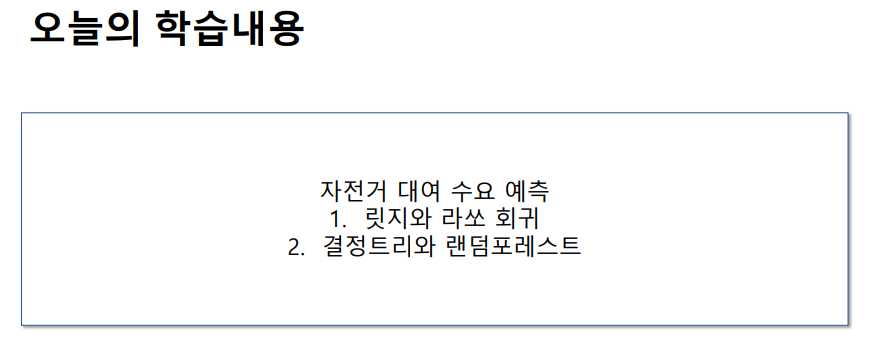

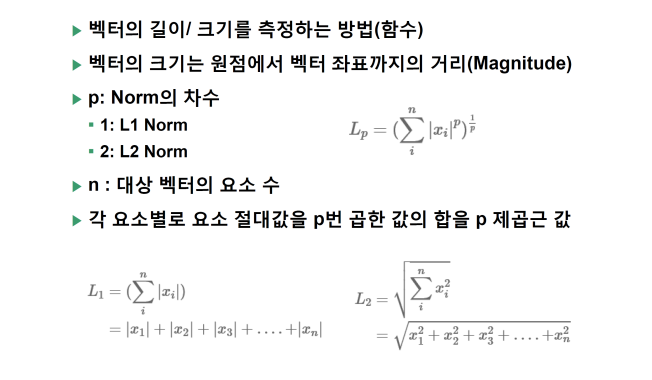

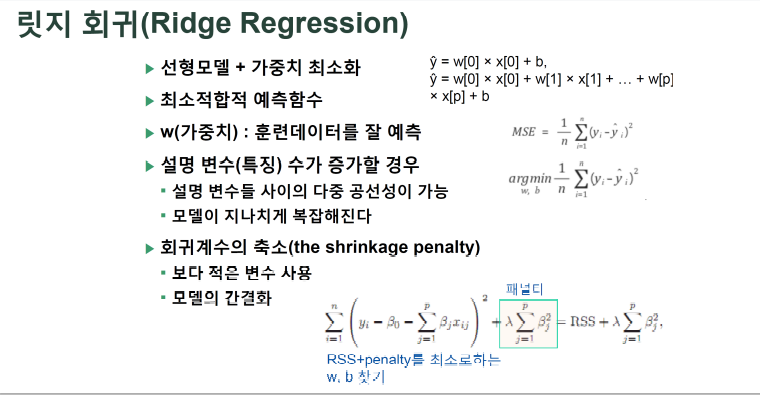

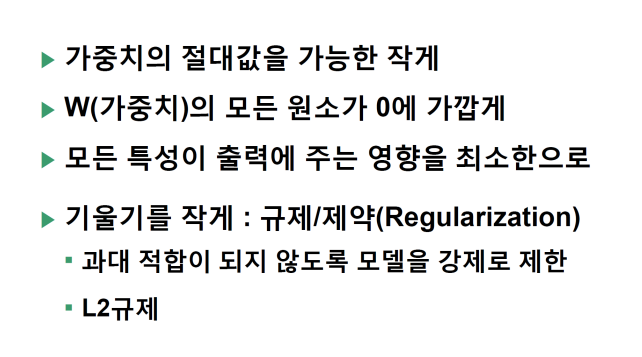"

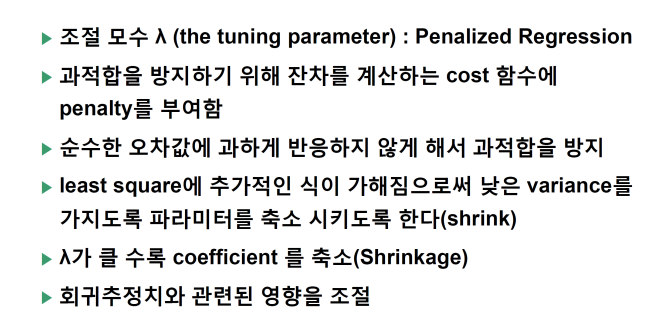

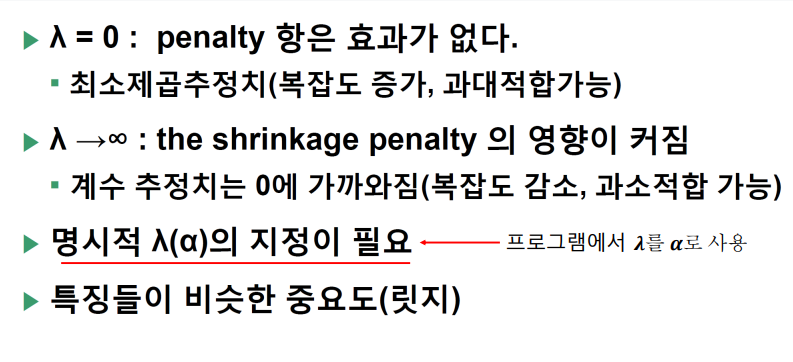

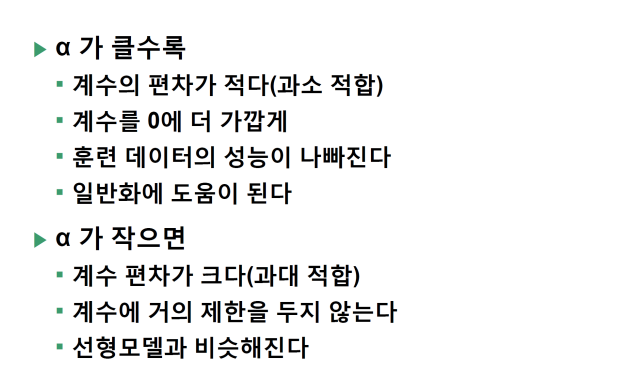

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X_train = pd.read_excel('X_train.xlsx')
X_test = pd.read_excel('X_test.xlsx')
y_train = pd.read_excel('y_train.xlsx')
y_test = pd.read_excel('y_test.xlsx')

In [3]:
log_y_train = np.log(y_train)
log_y_test = np.log(y_test)

In [4]:
def RMSLE(y_true, y_pred, convertExp):
    # 로그값을 넣으면 지수변환, 실제값을 넣으면 하지 않음
    if convertExp: # 입력값이 로그로 들어오면 지수변환
        y_true = np.exp(y_true)
        y_pred = np.exp(y_pred)
    # 로그변환
    log_true = np.log(y_true + 1) 
    log_pred = np.log(y_pred + 1)
    
    # RMSLE 계산
    output = np.sqrt(np.mean((log_true - log_pred) ** 2))
    #         제곱근   평균           차이의 제곱
    return output

In [5]:
from sklearn.linear_model import LinearRegression
Lin_model = LinearRegression() # 선형회귀모델 정의
Lin_model.fit(X_train, log_y_train) # train 특성과 타깃을 선형회귀 학습.

LinearRegression()

In [6]:
Lin_model.coef_ # 선형회귀 결과의 계수

array([[ 0.18075577,  0.02317785, -0.00587388, -0.00668758,  0.0131375 ,
         0.03163726, -0.0151898 ,  0.43768858,  0.10435207,  0.0265815 ]])

In [7]:
Lin_model.intercept_ # 선형회귀 결과의 상수항

array([-877.66154803])

In [8]:
Lin_pred_train = Lin_model.predict(X_train)
Lin_pred_test = Lin_model.predict(X_test)

In [9]:
RMSLE(log_y_train, Lin_pred_train, True) # 모델평가

C:\Users\gng06\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


count    1.021474
dtype: float64

In [10]:
RMSLE(log_y_test, Lin_pred_test, True) # 모델평가

count    1.017885
dtype: float64

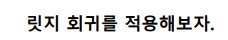

In [11]:
from sklearn.linear_model import Ridge
Ridge_model = Ridge(alpha = 1) # 릿지회귀모델 정의(패널티항의 계소인 alpha값 선언)
Ridge_model.fit(X_train, log_y_train) # train 특성과 타깃을 릿지회귀 학습

Ridge(alpha=1)

In [12]:
Ridge_model.coef_

array([[ 0.1807379 ,  0.02304908, -0.00591298, -0.00668399,  0.01314012,
         0.03163613, -0.01519013,  0.4374857 ,  0.10435121,  0.0265719 ]])

In [13]:
Ridge_model.intercept_

array([-877.25335658])

In [14]:
Rideg_pred_train = Ridge_model.predict(X_train)
Rideg_pred_test = Ridge_model.predict(X_test)

In [15]:
RMSLE(log_y_train, Rideg_pred_train, True)

C:\Users\gng06\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


count    1.021474
dtype: float64

In [16]:
RMSLE(log_y_test, Rideg_pred_test, True)

count    1.017885
dtype: float64

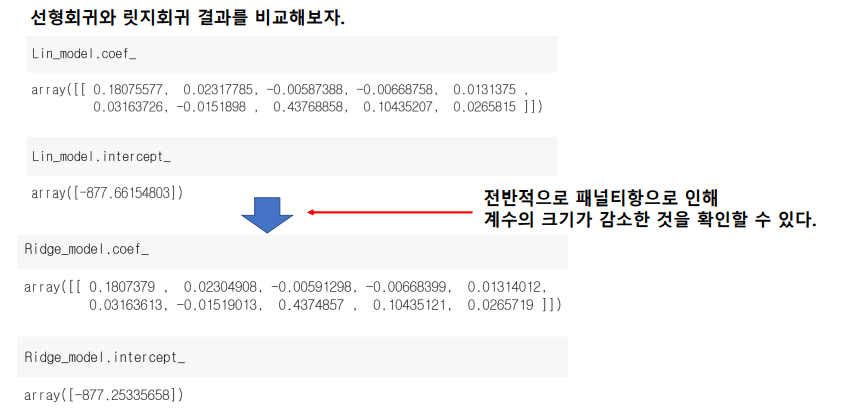

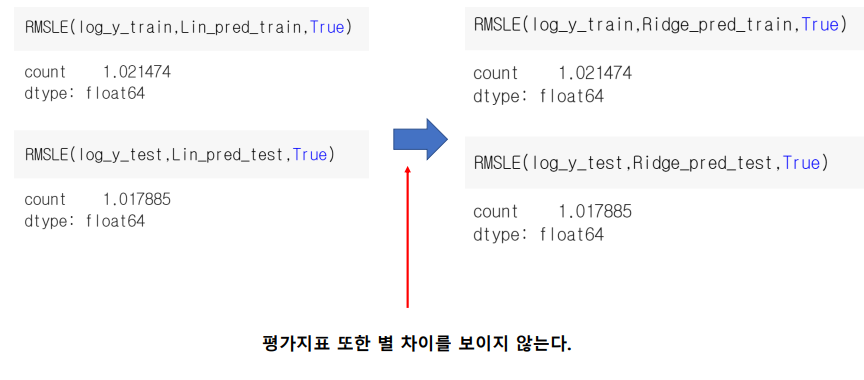

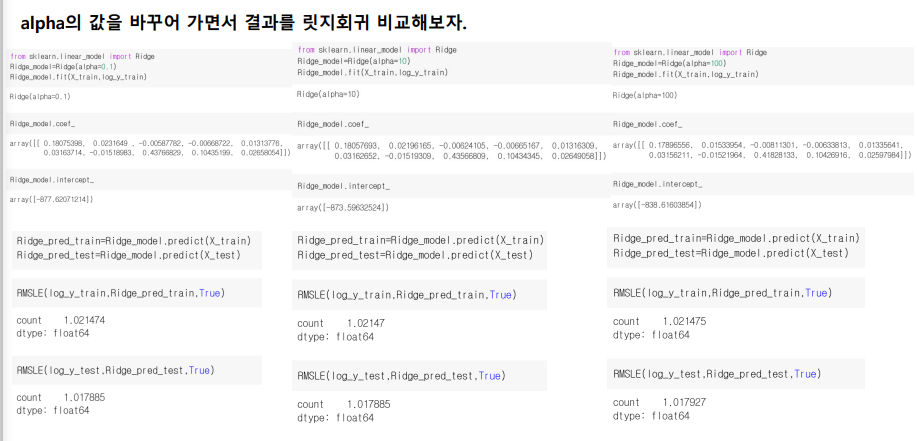

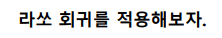

In [17]:
from sklearn.linear_model import Lasso
Lasso_model = Lasso(alpha = 1) # 라쏘회귀모델 정의(패널티항의 계소인 alpha값 선언)
Lasso_model.fit(X_train, log_y_train) # train 특성과 타깃을 릿지회귀 학습

Lasso(alpha=1)

In [18]:
X_train.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'year', 'hour', 'weekday'],
      dtype='object')

In [19]:
Lasso_model.coef_ # 불필요한 정보를 다날려준다.

array([ 0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.03940886, -0.01362931,  0.        ,  0.08512586,  0.        ])

In [20]:
Lasso_model.intercept_

array([3.47753078])

In [21]:
Lasso_pred_train = Lasso_model.predict(X_train)
Lasso_pred_test = Lasso_model.predict(X_test)

In [22]:
Lasso_model.predict(X_train) 
# 행방향으로 데이터가 나와서 열방향인 log_y_train과 shape가 달라 에러가 뜬다.

array([4.96676848, 4.8272205 , 5.30243438, ..., 5.43833882, 5.35843914,
       3.81652003])

In [23]:
RMSLE(log_y_train, Lasso_pred_train, True)

ValueError: Unable to coerce to Series, length must be 1: given 8707

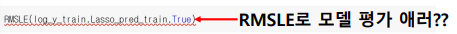

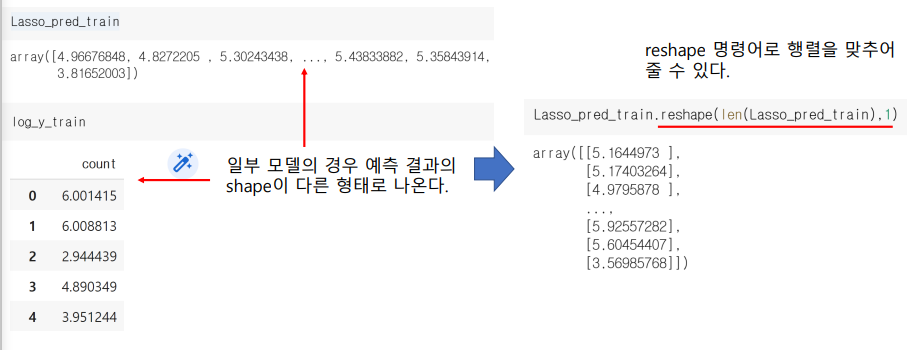

In [24]:
Lasso_pred_train =  Lasso_pred_train.reshape(len(Lasso_pred_train), 1)
# len(Lasso_pred_train)이 행 1이 열로 reshape

In [25]:
Lasso_pred_test = Lasso_pred_test.reshape(len(Lasso_pred_test), 1)
# len(Lasso_pred_test)이 행 1이 열로 reshape

In [26]:
RMSLE(log_y_train, Lasso_pred_train, True)

C:\Users\gng06\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


count    1.06907
dtype: float64

In [27]:
RMSLE(log_y_test, Lasso_pred_test, True)

count    1.065259
dtype: float64

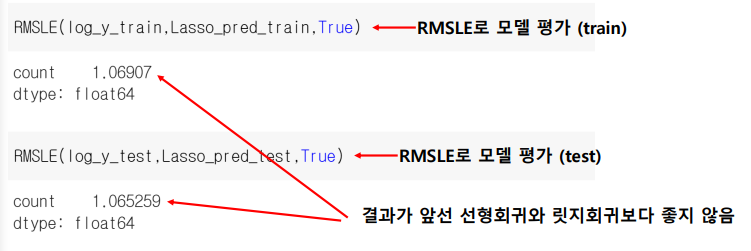

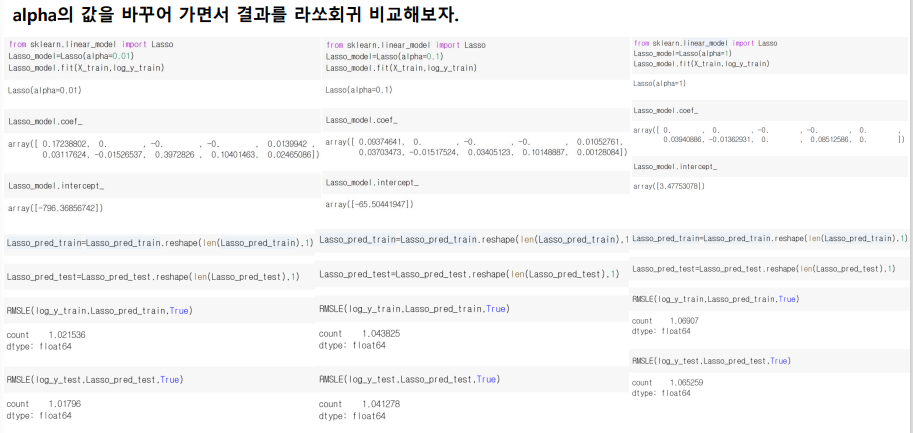

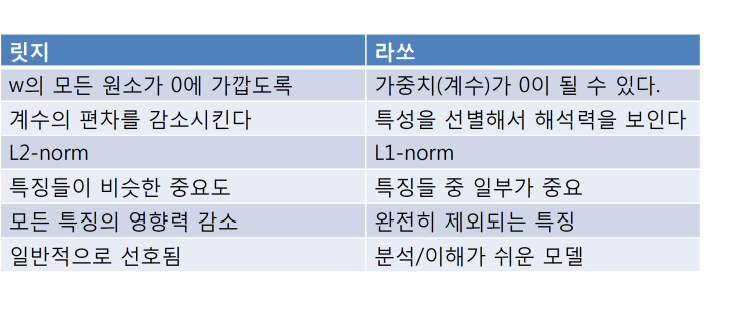

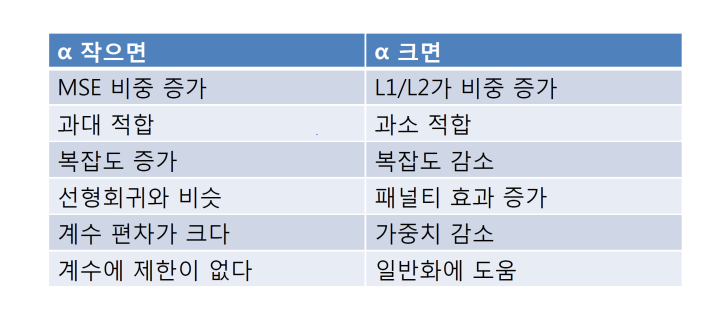

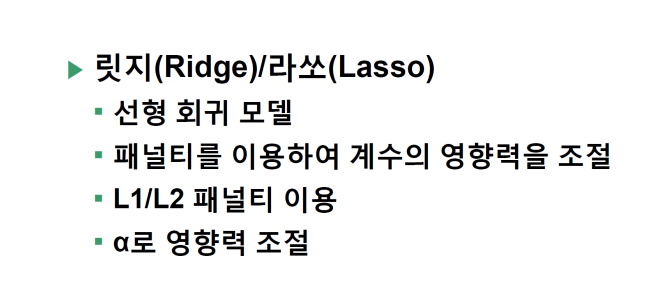

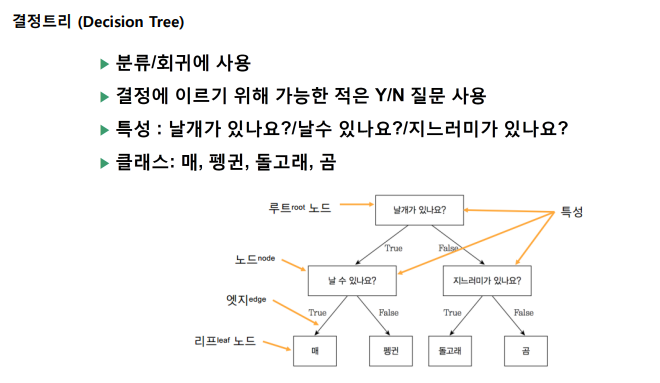

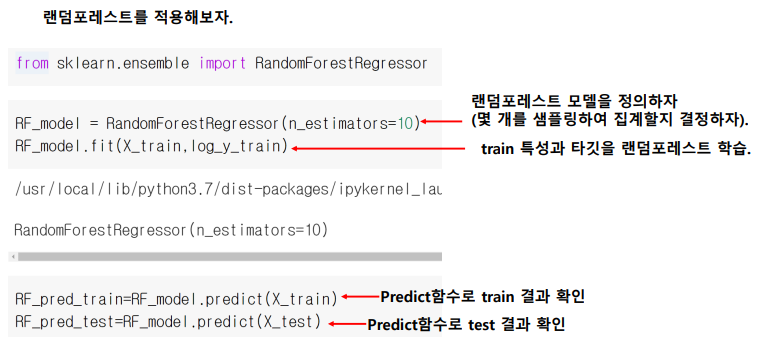

In [28]:
from sklearn.ensemble import RandomForestRegressor

In [29]:
RF_model = RandomForestRegressor(n_estimators=10)
RF_model.fit(X_train, log_y_train)

C:\Users\gng06\AppData\Local\Temp\ipykernel_9904\3324404460.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_model.fit(X_train, log_y_train)


RandomForestRegressor(n_estimators=10)

In [30]:
RF_pred_train = RF_model.predict(X_train)
RF_pred_test = RF_model.predict(X_test)

In [31]:
RF_pred_train = RF_pred_train.reshape(len(RF_pred_train), 1)
RF_pred_test = RF_pred_test.reshape(len(RF_pred_test), 1)

In [32]:
RMSLE(log_y_train, RF_pred_train, True)

C:\Users\gng06\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


count    0.14092
dtype: float64

In [33]:
RMSLE(log_y_test, RF_pred_test, True)

count    0.328436
dtype: float64

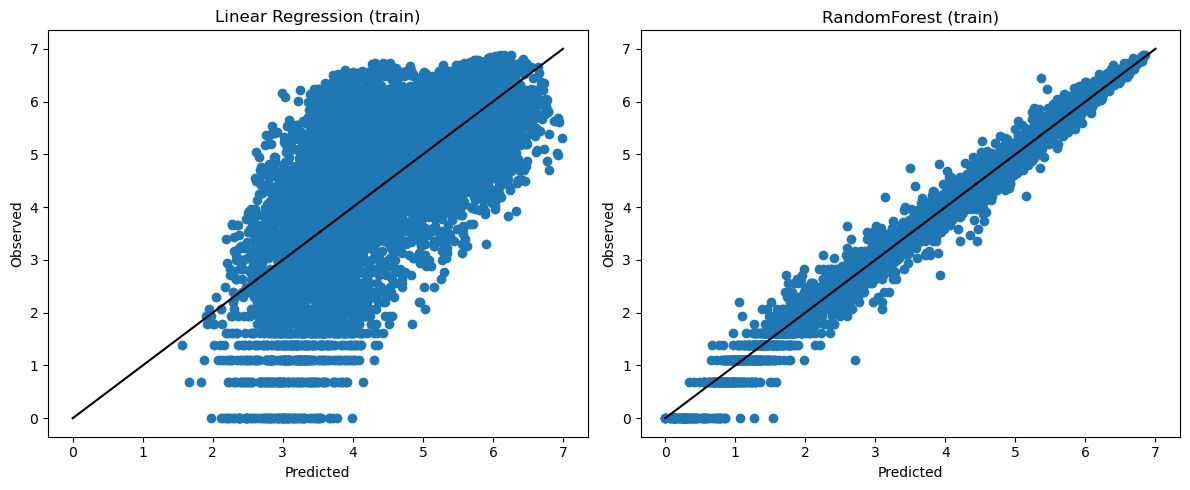

In [34]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
x = np.linspace(0,7)
y=x
lines = plt.plot(Lin_model.predict(X_train), log_y_train,'o',x,y,'k')
plt.xlabel('Predicted')
plt.ylabel('Observed')
plt.title('Linear Regression (train)')
plt.tight_layout()

plt.subplot(1,2,2)
lines2 = plt.plot(RF_model.predict(X_train), log_y_train,'o',x,y,'k')
plt.xlabel('Predicted')
plt.ylabel('Observed')
plt.title('RandomForest (train)')
plt.tight_layout()

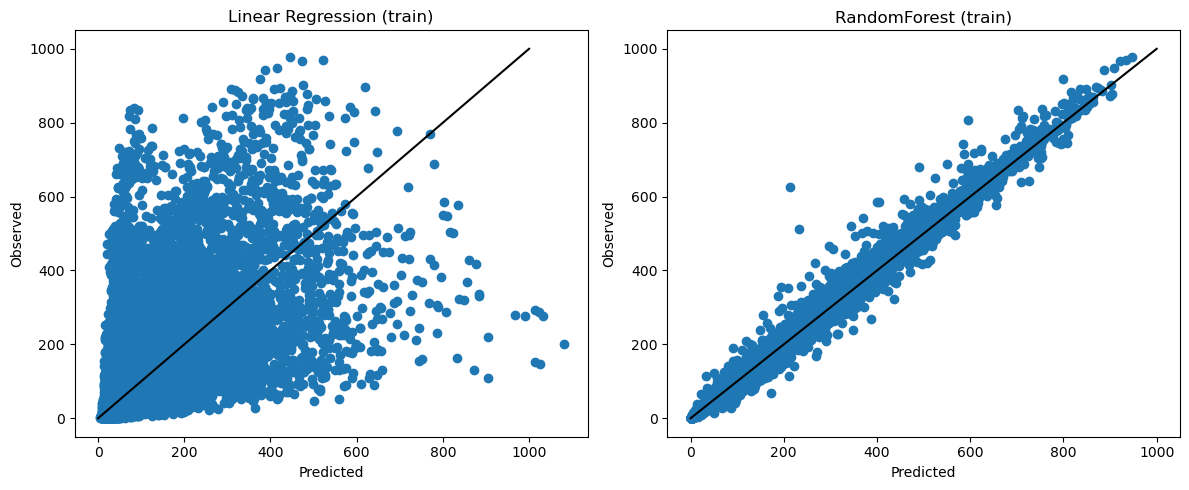

In [35]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
x = np.linspace(0,1000)
y=x
lines = plt.plot(np.exp(Lin_model.predict(X_train)), y_train,'o',x,y,'k')
plt.xlabel('Predicted')
plt.ylabel('Observed')
plt.title('Linear Regression (train)')
plt.tight_layout()

plt.subplot(1,2,2)
lines2 = plt.plot(np.exp(RF_model.predict(X_train)), y_train,'o',x,y,'k')
plt.xlabel('Predicted')
plt.ylabel('Observed')
plt.title('RandomForest (train)')
plt.tight_layout()

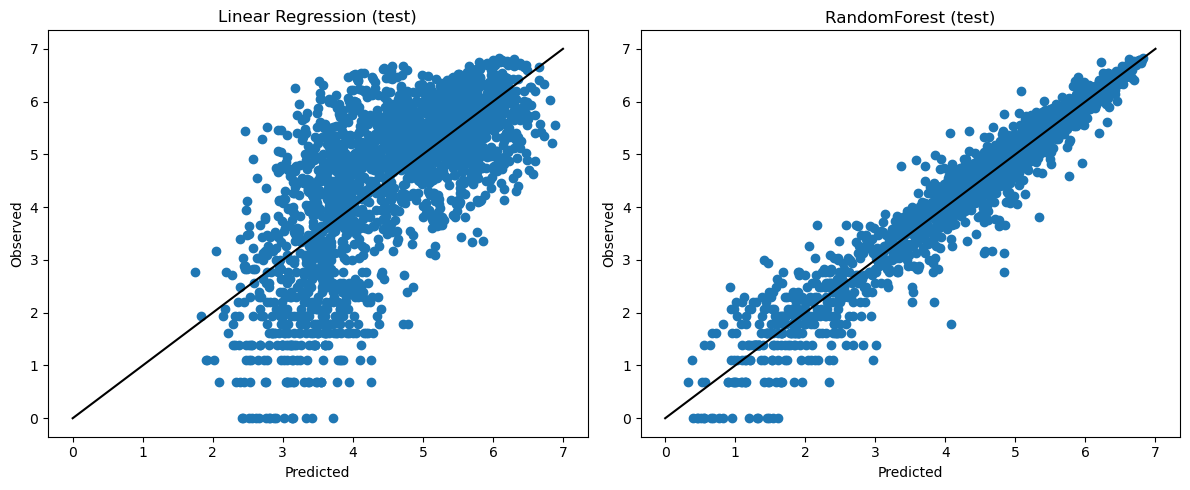

In [36]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
x = np.linspace(0,7)
y=x
lines = plt.plot(Lin_model.predict(X_test), log_y_test,'o',x,y,'k')
plt.xlabel('Predicted')
plt.ylabel('Observed')
plt.title('Linear Regression (test)')
plt.tight_layout()

plt.subplot(1,2,2)
lines2 = plt.plot(RF_model.predict(X_test), log_y_test,'o',x,y,'k')
plt.xlabel('Predicted')
plt.ylabel('Observed')
plt.title('RandomForest (test)')
plt.tight_layout()

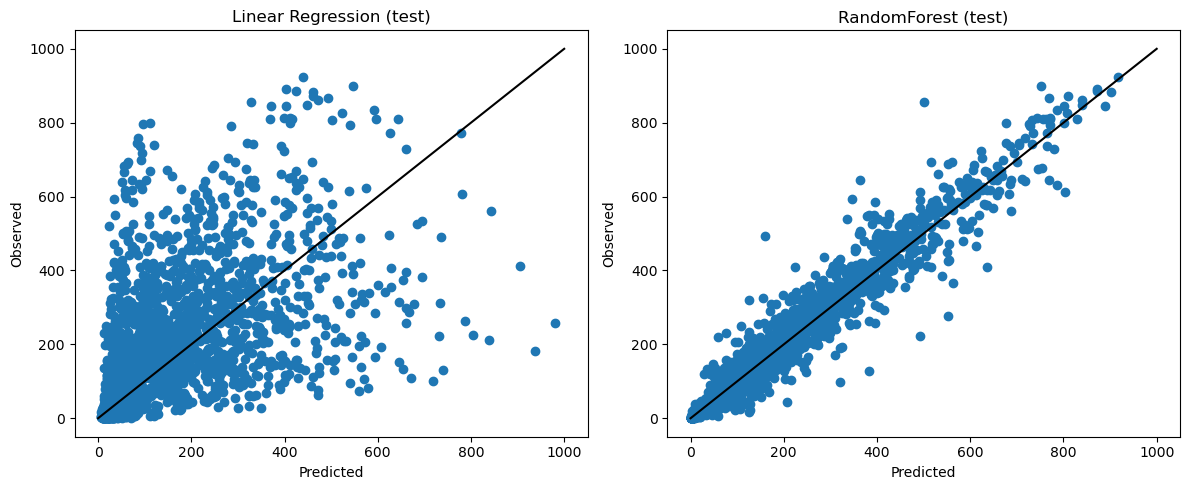

In [37]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
x = np.linspace(0,1000)
y=x
lines = plt.plot(np.exp(Lin_model.predict(X_test)), y_test,'o',x,y,'k')
plt.xlabel('Predicted')
plt.ylabel('Observed')
plt.title('Linear Regression (test)')
plt.tight_layout()

plt.subplot(1,2,2)
lines2 = plt.plot(np.exp(RF_model.predict(X_test)), y_test,'o',x,y,'k')
plt.xlabel('Predicted')
plt.ylabel('Observed')
plt.title('RandomForest (test)')
plt.tight_layout()